# Εισαγωγή scikit-learn και dataset στο notebook

αρχικά κάνουμε upgrade στις βιβλοθήκες που θα χρειαστούμε, αν δεν έχουμε ήδη κάνει

In [1]:
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package

# Μετά από αυτές τις εντολές πρέπει να κάνετε restart το kernel

Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages
Requirement already up-to-date: numpy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages


![UCI ML Logo](http://archive.ics.uci.edu/ml/assets/logo.gif "UCI Machine Learning Repository")

To [UCI ML Repository](http://archive.ics.uci.edu/ml/index.php) είναι το διασημότερο αποθετήριο datasets για Machine Learning. Το dataset με το οποίο θα δουλέψουμε είναι το [Breast Cancer Wisconsin Diagnostic Database](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). Το dataset περιλαμβάνει διάφορες πληροφορίες για όγκους σχετιζόμενους με τον καρκίνο του στήθους καθώς και ετικέτες για κάθε δείγμα (sample), αν το δείγμα αντιστοιχεί σε καλοήθη όγκο ή κακοήθη. Το σύνολο δεδομένων έχει 569 δείγματα για αντίστοιχους όγκους και περιλαμβάνει 30 χαρακτηριστικά (attributes) για κάθε δείγμα, όπως ακτίνα του όγκου, υφή, ομοιομορφία και περιοχή. Θα χρησιμοποιήσουμε αυτό το dataset και τα χαρακτηριστικά για να προβλέψουμε αν ένας όγκος είναι κακοήθης ή όχι.

Το Scikit-learn έχει για κάποια datasets, μεταξύ των οποίων και το breast cancer, έτοιμες συναρτήσεις για να τα φορτώνουμε χωρίς να χρειαστεί να διαβάσουμε text file.

In [2]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()

Η μεταβλητή "data" είναι ένα αντικείμενο Python που δουλεύει σαν dictionary.

| **key**              | **value**                                             | **type**     | **size**   |
| :------------------- | :---------------------------------------------------- | :----------- | :--------- |
| **'DESCR'**          | 'Breast Cancer Wisconsin (Diagnostic) Database...'    | str          |  1         | 
| **'data'**           | [[1.799, 1.038, 1.228,...]...]                        | float array  |  (569,30)  | 
| **'feature_names'**  | ['mean radius', 'mean texture', ...]                  | str array    | (30,)      |
| **'target'**         | [0, 0, 0, ..., 0, 0, 1]                               | int array    | (569,)     |
| **'target_names'**   | ['malignant', 'benign']                               | str array    | (2,)       |

Τα σημαντικά κλειδιά του λεξικού είναι οι ονομασίες των κατηγοριών εξόδου (target_names), οι κατηγορίες (ή κλάσεις ή ετικέτες) εξόδου (target), τα ονόματα των χαρακτηριστικών (feature_names) και τέλος τα ίδια τα χαρακτηριστικά (data). Στην πράξη χρειαζόμαστε μόνο τα χαρακτηριστικά (features) και τις ετικέτες τους (labels). Οι ονομασίες μας πληροφορούν για τη φυσική ερμηνεία των χαρακτηριστικών.

Δημιουργούμε νέες μεταβλητές για κάθε σημαντικό σύνολο πληροφορίας του dataset:

In [3]:
# Organize our data
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [4]:
# ποιες είναι οι κατηγορίες (ετικέτες) μας
print label_names


['malignant' 'benign']


In [5]:
# οι κατηγορίες όλων των 569 δειγμάτων 0: κακοήθης - malignant (Μ) 1: καλοήθης - benign (Β)
print labels
# οι κατηγορίες είναι ένα μονοδιάστατο array
print labels.shape
# μετράμε τη συχνότητα των δύο κλάσεων
import numpy as np
print "frequencies:", np.bincount(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [6]:
# η κατηγορία του πρώτου δείγματος
print labels[0]

0


In [7]:
# τα ονόματα των χαρακτηριστικών (features)
print feature_names

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# το όνομα του πρώτου χαρακτηριστικού
print feature_names[0]

mean radius


In [9]:
# οι διαστάσεις όλων των χαρακτηριστικών
# τα χαρακτηριστικά του πρώτου δείγματος (κακοήθες)
print features.shape
print features[0]

(569, 30)
[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]


Στο συγκεκριμένο παράδειγμα, τo πρώτο δείγμα μας είναι κακοήθες με ακτίνα του όγκου  1.79900000e+01.

Έχουμε φορτώσει το dataset, θα προχωρήσουμε στο να δημιουργήσουμε απλούς ταξινομητές για να προβλέπουμε αν οι όγκοι είναι καλοήθεις ή κακοήθεις.

# Train set, test set & αξιολόγηση (πιστότητα) ταξινομητών

Η αξιολόγηση των ταξινομητών γίνεται πάντα σε δεδομένα που δεν έχουν δει κατά την εκπαίδευση έτσι ώστε να αξιολογήσουμε τη δυνατότητα γενίκευσής τους. Συνεπώς, πρωτού φτιάξουμε το μοντέλο κάθε ταξινομητή χωρίζουμε τα δεδομένα μας τυχαία σε ένα σύνολο εκπαίδευσης (train set) και ένα σύνολο ελέγχου (test set).
Παρακάτω βλέπουμε ένα παράδειγμα διαχωρισμού του dataset με αναλογία 60-40:

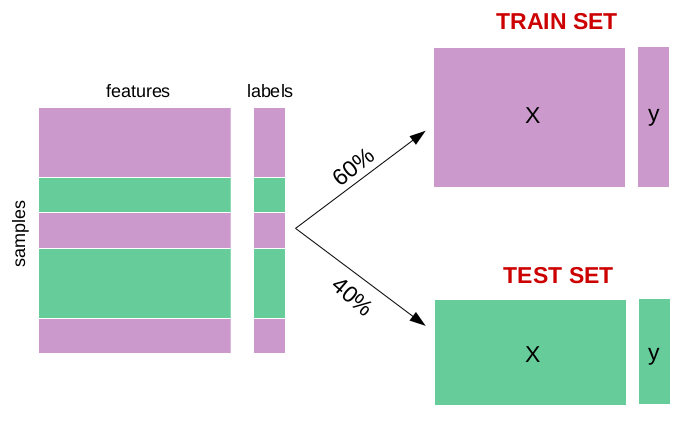

Χρησιμοποιούμε το train set για να εκτιμούμε και να βελτιώνουμε το μοντέλο του ταξινομητή κατά την ανάπτυξή του.

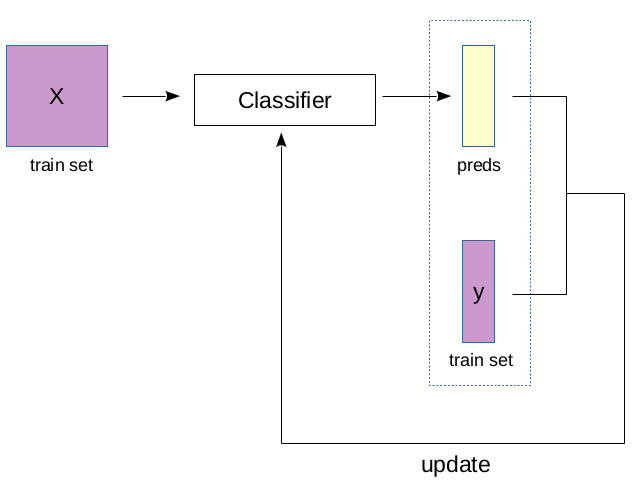

Χρησιμοποιούμε μετά το test set για να αξιολογήσουμε στατιστικά την απόδοση του μοντέλου μας.

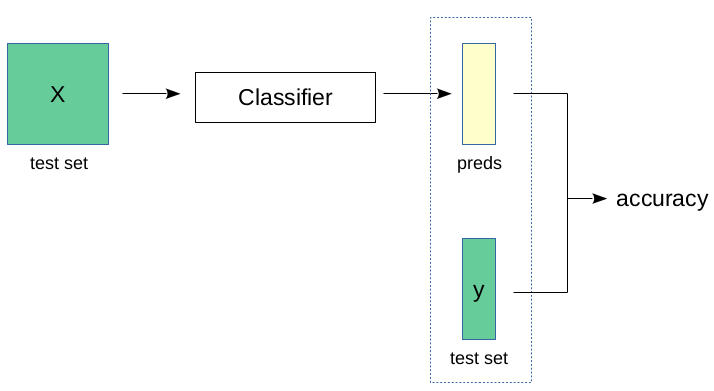

Το sklearn έχει τη συνάρτηση train_test_split() που ανακατεύει τυχαία τα δείγματα και τα διαχωρίζει σε train και test με βάση κάποιο ποσοστό που θα της δώσουμε.

In [10]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.33)

Θα δοκιμάσουμε πρώτα κάποιες πολύ απλές τακτικές ταξινόμησης. Η κλάση DummyClassifier δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:
* “uniform”: προβλέπει τυχαία και ομοιόμορφα.
* “constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης.
* “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
* “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

In [11]:
from sklearn.dummy import DummyClassifier
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

#με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
model = dc_uniform.fit(train, train_labels)

#με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
preds = dc_uniform.predict(test)
print preds

[0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 0]


Για την αξιολόγηση, το πιο απλό κριτήριο είναι να συγκρίνουμε το ποσοστό ομοιότητας των πίνακων preds και test_labels. Το κριτήριο αυτό ονομάζεται πιστότητα (accuracy). Αν το κάναμε manually, για κάθε στοιχείο (δείγμα) των πινάκων που είναι όμοιο (0 και 0 ή 1 και 1) αυξάνουμε έναν μετρητή. Στην περίπτωση που είναι ανόμοια δεν τον αυξάνουμε. Διαιρούμε την τελική τιμή του μετρητή με το πλήθος των στοιχείων του πίνακα.
Το προηγούμενο for loop μας το δίνει έτοιμο η συνάρτηση accuracy_score:

In [12]:
from sklearn.metrics import accuracy_score
print accuracy_score(test_labels, preds)

# ο υπολογισμός του accuracy είναι επίσης -ακόμα πιο βολικά- και μέθοδος του αντικειμένου dummy classifier
print dc_uniform.score(test, test_labels) # σε κάθε κλήση της dc_uniform έχουμε ξανά τυχαίες προβλέψεις

0.515957446809
0.537234042553


Ας αποθηκεύσουμε την πιστότητα όλων των dummy classifiers σε ένα λεξικό και να την τυπώσουμε από την καλύτερη στη χειρότερη

In [13]:
wisconsin_accuracy = {}
wisconsin_accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)
model = dc_constant_0.fit(train, train_labels)
wisconsin_accuracy['constant 0'] = dc_constant_0.score(test, test_labels)
model = dc_constant_1.fit(train, train_labels)
wisconsin_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)
model = dc_most_frequent.fit(train, train_labels)
wisconsin_accuracy['most frequent label'] = dc_most_frequent.score(test, test_labels)
model = dc_stratified.fit(train, train_labels)
wisconsin_accuracy['stratified'] = dc_stratified.score(test, test_labels)

print "Classification Accuracy on the Wisconsin Breast Cancer Dataset (33% test set)\n"
for key, value in sorted(wisconsin_accuracy.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s" % (key, value)
# Explanation: "d.iteritems()" returns an iterator object. In "sorted(d.iteritems(), key=lambda(k, v): (v, k))",
# "key=lambda(k, v): (v, k)" means sorting will be firstly based on the descending order of value i.e "-v" and then ascending order of key i.e "k"

Classification Accuracy on the Wisconsin Breast Cancer Dataset (33% test set)

constant 1: 0.627659574468
most frequent label: 0.627659574468
stratified: 0.574468085106
uniform (random): 0.505319148936
constant 0: 0.372340425532


# Naive Bayes Classifier

![$P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Bayes%27_Theorem_MMB_01.jpg/220px-Bayes%27_Theorem_MMB_01.jpg "A blue neon sign, showing the simple statement of Bayes’ theorem")

H βασική ιδέα λειτουργίας του ταξινομητή είναι α) ο γνωστός νόμος του Bayes $$P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$$

και β) η (naive) υπόθεση ότι τα χαρακτηριστικά είναι όλα ανεξάρτητα μεταξύ τους (δεν ισχύει γενικά, αλλά ο ταξινομητής είναι πρακτικά καλός σε πολλές περιπτώσεις). Παράδειγμα: θα βρέξει σήμερα? Naive Bayes: "Θα το προβλέψω με βάση το παρελθόν θεωρώντας ότι τα χαρακτηριστικά θερμοκρασία, νεφοκάλυψη και ατμοσφαιρική πίεση είναι όλα ανεξάρτητα μεταξύ τους".

Με δεδομένα μια μεταβλητή κατηγορίας (κλάσης) $y$ και ένα εξαρτώμενο διάνυσμα χαρακτηριστικών $x_1$ μέχρι $x_n$, σύμφωνα με το θεώρημα του Bayes θα ισχύει 
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}{P(x_1, \dots, x_n)}$$
Ισχύει ότι $P(x_1, \dots, x_i, \dots, x_n \mid y) =  \prod_{i=1}^{n} P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n)$ και κάνουμε την αφελή υπόθεση ότι το χαρακτηριστικό $x_i$ για κάθε $i$ εξαρτάται μόνο από την κλάση $y$ και όχι από οποιοδήποτε άλλο χαρακτηριστικό
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$
αυτό οδηγεί στην απλοποίηση
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$$
Με δεδομένη είσοδο, το $P(x_1, \dots, x_n)$ είναι σταθερό. Συνεπώς μπορούμε να χρησιμοποιήσουμε τον ακόλουθο κανόνα ταξινόμησης $$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
Το $P(y)$ είναι η υπόθεσή μας και ισούται με τη σχετική συχνότητα της κλάσης $y$ στο training set. To $P(x_i \mid y)$ είναι η πιθανοφάνεια δηλαδή η πιθανότητα του δείγματος με δεδομένη την υπόθεσή μας και μπορεί επίσης να υπολογιστεί απλά από το training set. Οι διάφοροι Naive Bayes classifiers διαφοροποιούνται κυρίως από τις υποθέσεις που κάνουν ως προς την κατανομή $P(x_i \mid y)$. Η κλάση $\hat{y}$ που ανατίθεται σε ένα νέο δείγμα είναι αυτή που μεγιστοποιεί το δεξί μέλος της σχέσης.

## Ένα παράδειγμα NB με κατηγορικές μεταβλητές

Έστω ότι για 14 μέρες παρατηρήσαμε 4 μεταβλητές του καιρού (νεφοκάλυψη, θερμοκρασία, υγρασία και άνεμο) και το αν τελικά παίξαμε τέννις. Τα χαρακτηριστικά μας είναι κατηγορικά, παίρνουν δηλαδή διακριτές τιμές από ενα ορισμένο σύνολο τιμών.

| Day | Outlook  | Temperature | Humidity | Wind   | Play Tennis? |
|-----|----------|-------------|----------|--------|--------------|
| 1   | Sunny    | Hot         | High     | Weak   | No           |
| 2   | Sunny    | Hot         | High     | Strong | No           |
| 3   | Overcast | Hot         | High     | Weak   | Yes          |
| 4   | Rain     | Mild        | High     | Weak   | Yes          |
| 5   | Rain     | Cool        | Normal   | Weak   | Yes          |
| 6   | Rain     | Cool        | Normal   | Strong | No           |
| 7   | Overcast | Cool        | Normal   | Strong | Yes          |
| 8   | Sunny    | Mild        | High     | Weak   | No           |
| 9   | Sunny    | Cool        | Normal   | Weak   | Yes          |
| 10  | Rain     | Mild        | Normal   | Weak   | Yes          |
| 11  | Sunny    | Mild        | Normal   | Strong | Yes          |
| 12  | Overcast | Mild        | High     | Strong | Yes          |
| 13  | Overcast | Hot         | Normal   | Weak   | Yes          |
| 14  | Rain     | Mild        | High     | Strong | No           |

Το πρώτο βήμα είναι να γράψουμε 4 πίνακες αναφοράς ("look-up tables"), έναν για κάθε χαρακτηριστικό,  με την πιθανότητα να παιχτεί ή να μην παιχτεί τέννις σε σχέση με το χαρακτηριστικό. Έχουμε συνολικά 5 περιπτώσεις που δεν μπορέσαμε να παίξουμε και 9 που μπορέσαμε. Οι 4 πίνακες είναι οι ακόλουθοι:

| OUTLOOK  | Play = Yes | Play = No | Total |	| TEMPERATURE | Play = Yes | Play = No | Total |	| HUMIDITY | Play = Yes | Play = No | Total |	| WIND   | Play = Yes | Play = No | Total |
|----------|------------|-----------|-------|	|-------------|------------|-----------|-------|	|----------|------------|-----------|-------|	|--------|------------|-----------|-------|
| Sunny    | 2/9        | 3/5       | 5/14  |	| Hot         | 2/9        | 2/5       | 4/14  |	| High     | 3/9        | 4/5       | 7/14  |	| Strong | 3/9        | 3/5       | 6/14  |
| Overcast | 4/9        | 0/5       | 4/14  |	| Mild        | 4/9        | 2/5       | 6/14  |	| Normal   | 6/9        | 1/5       | 7/14  |	| Weak   | 6/9        | 2/5       | 8/14  |
| Rain     | 3/9        | 2/5       | 5/14  |	| Cool        | 3/9        | 1/5       | 4/14  |	| Cool     | 3/9        | 1/5       | 4/14  |	| Cool   | 3/9        | 1/5       | 4/14  |
και τέλος υπολογίζουμε την πιθανότητα να παίξουμε και να μην παίξουμε:

P(Play=Yes) = 9/14

P(Play=No) = 5/14

### Testing

Έστω ένα νέο δείγμα X = (Outlook=Sunny, Temperature=Cool, Humidity=High, Wind=Strong). Σε ποια κατηγορία ανήκει; (θα παίξουμε τέννις ή όχι).

Υπολογίζουμε πρώτα από τους πίνακες αναφοράς την "πιθανότητα" να παίξουμε

* P(Outlook=Sunny | Play=Yes) = 2/9
* P(Temperature=Cool | Play=Yes) = 3/9
* P(Humidity=High | Play=Yes) = 3/9
* P(Wind=Strong | Play=Yes) = 3/9
* P(Play=Yes) = 9/14

Σύμφωνα με τον κανόνα ταξινόμησης του NB η πιθανότητα να παίξουμε είναι ανάλογη του γινομένου των προηγούμενων 

P(X|Play=Yes)P(Play=Yes) = (2/9) \* (3/9) \* (3/9) \* (3/9) \* (9/14) = 0.0053

Υπολογίζουμε παρόμοια την "πιθανότητα" να μην παίξουμε

* P(Outlook=Sunny | Play=No) = 3/5
* P(Temperature=Cool | Play=No) = 1/5
* P(Humidity=High | Play=No) = 4/5
* P(Wind=Strong | Play=No) = 3/5
* P(Play=No) = 5/14

P(X|Play=No)P(Play=No) = (3/5) \* (1/5) \* (4/5) \* (3/5) \* (5/14) = 0.0206

Επειδή η ποσότητα 0.0206 είναι μεγαλύτερη από την 0.0053, η απόφαση του Naive Bayes είναι να μην παίξουμε τέννις. Οι ποσότητες αυτές (του αριθμητή) μας αρκούν για την απόφαση γιατί ο παρονομαστής είναι σταθερός. Για να πάρουμε τις πλήρεις πιθανότητες για το συγκεκριμένο δείγμα Χ υπολογίζουμε και τον παρονομαστή:

* P(X) = P(Outlook=Sunny) \* P(Temperature=Cool) \* P(Humidity=High) \* P(Wind=Strong)
* P(X) = (5/14) \* (4/14) \* (7/14) \* (6/14)
* P(X) = 0.02186

* P(Play=Yes | X) = 0.0053/0.02186 = 0.2424
* P(Play=No | X) = 0.0206/0.02186 = 0.9421

Θέλουμε να δοκιμάσουμε τον Naive Bayes στο Wisconsin. Εδώ όμως έχουμε συνεχείς μεταβλητές. Όπως είπαμε θα πρέπει να κάνουμε μια υπόθεση για την κατανομή $P(x_i \mid y)$. Θα θεωρήσουμε ότι η κατανομή κάθε χαρακτηριστικού ως προς κάθε κλάση ακολουθεί την κανονική κατανομή:
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$
Ο συγκεκριμένος ταξινομητής είναι ο Gaussian Naive Bayes. Πρακτικά, με τα δεδομένα του training set, για κάθε κλάση υπολογίζουμε τη μέση τιμή $\mu_y$ και τη διακύμανση $\sigma^2_y$ κάθε χαρακτηριστικού για τη συγκεκριμένη κλάση. 

Ας δοκιμάσουμε τον Gaussian Naive Bayes στο Wisconsin:

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model = gnb.fit(train, train_labels)
# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
wisconsin_accuracy['gaussian naive bayes'] = gnb.score(test, test_labels)
# και ξανατυπώνουμε τα sorted αποτελέσματα
print "Classification Accuracy on the Wisconsin Breast Cancer Dataset (33% test set)\n"
for key, value in sorted(wisconsin_accuracy.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s" % (key, value)

Classification Accuracy on the Wisconsin Breast Cancer Dataset (33% test set)

gaussian naive bayes: 0.925531914894
constant 1: 0.627659574468
most frequent label: 0.627659574468
stratified: 0.574468085106
uniform (random): 0.505319148936
constant 0: 0.372340425532


# Εισαγωγή dataset μέσω Pandas και CSV file

To scikit learn έχει διαθέσιμο για φόρτωση απευθείας με συναρτήσεις μόνο ένα μικρό αριθμό datasets. Στη γενική περίπτωση, η τυπική διαδικασία για εισαγωγή datasets που θα συναντήσουμε είναι να διαβάζουμε ένα delimited text file (τιμές που διαχωρίζονται με ένα delimiter δλδ comma -Comma Separated Values, CSV-, semicolon etc) και να το αποθηκεύουμε σε πίνακες χαρακτηριστικών και ετικετών (class labels). 

Θα κάνουμε την προηγούμενη διαδικασία manually διαβάζοντας το breast cancer από text file. Η σελίδα του UCI για το breast cancer είναι [αυτή](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29), και το dataset μπορούμε να το αποθηκεύσουμε locally στο Desktop απο το φάκελο "Data Folder" και το αρχείο ["wdbc.data"](http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data). Το ανοίγουμε, δεξί κλικ και "Save as" (ή απευθείας "Save link as"). 

Το ανεβάζουμε στο notebook μέσω του "Find and Add Data" button. Mπορουμε να το κάνουμε drop ή να κάνουμε browse. Πάμε σε code block και κάνουμε "Insert to code" και "Insert StringIO object". Θα γίνει εισαγωγή μιας απαραίτητης συνάρτησης (μια φορά τη χρειαζόμαστ στο notebook, όσα object και να εισάγουμε). Τρέξτε αυτό το block κώδικα.

In [15]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_38ba68786cf84e1cbb5cc80f5a49fbed(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_12aa8a19e7658083ad07c4a051557c29528d77fd','domain': {'id': 'dd180082cfbb4aba93677ea2bbc9d7ff'},
            'password': 'gYyO_C0Nd6252/QB'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
data_3 = get_object_storage_file_with_credentials_38ba68786cf84e1cbb5cc80f5a49fbed('FinalProject', 'wdbc.data.txt')

Στο "Data folder" του UCI εκτός του "wdbc.data.txt" έχει και το ["wdbc.names"](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) με τις ονομασίες των features. Έχουμε 32 attributes, το πρώτο είναι το ID του δείγματος, το δεύτερο η διάγνωση ("Μ" για malignant και "B" για benign) και τέλος 30 real-valued χαρακτηριστικά εισόδου. Θα αποθηκεύσουμε τη δεύτερη κολώνα (διάγνωση) σε ένα dataframe "labels_df" και τα αριθμητικά features σε ένα dataframe "features_df". Το sample ID στην πρώτη κολώνα δεν μας ενδιαφέρει. Ακολουθούμε πάντα τη διαδικασία του διαχωρισμού σε διαφορετικά dataframes όταν τα attributes είναι διαφορετικών data types (όπως εδώ που έχουμε string για την κλάση και float για τα υπόλοιπα χαρακτηριστικά), γιατί αλλιώς δυσκολεύει η μετατροπή σε numpy array που θα κάνουμε στη συνέχεια.

In [16]:
# data contains no header info so we read a panda dataframe with header=None option
data_df = pd.read_csv(data_3, header=None)
labels_df = data_df.iloc[:, [1]]
features_df = data_df.iloc[:, 2:]
# μετατρέπουμε το dataframe σε numpy array
np_features = features_df.values

print np_features[0]
print np_features.shape

[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]
(569, 30)


Στο dataframe - κολώνα με τις κλάσεις "labels_df" πρέπει να μετατρέψουμε τα string 'M' και 'Β' σε 0 και 1 αντίστοιχα. Ορίζουμε ένα mapping και εφαρμόζουμε τη μέθοδο replace με το συγκεκριμένο mapping. 

Τέλος, αν εφαρμόσουμε μόνο τη μέθοδο "values" στο "labels_df" θα πάρουμε ένα np array δύο διαστάσεων (569, 1), ενώ θέλουμε να είναι μονοδιάστατος (569,). Για το λόγο αυτό εφαρμόζουμε επιπρόσθετα τη μέθοδο flatten(). Επιβεβαιώνουμε ότι ο αρχικός πίνακας labels είναι ίδιος με τον np_labels.

In [17]:
mapping = {'M': 0, 'B': 1}
labels_df = labels_df.replace(mapping)
# μετατρέπουμε το dataframe σε μονοδιάστατο array
np_labels = labels_df.values.flatten()

# επιβεβαιώνουμε ότι ο αρχικός πίνακας labels είναι ίδιος με τον np_labels
print np_labels
print np_labels.shape
print np.array_equal(labels, np_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 